In [ ]:
import requests
import scanpy

In [3]:
# download the data from Google Drive

_GOOGLE_DRIVE_URL = "https://docs.google.com/uc?export=download"
_CHUNK_SIZE = 32768
def _GET_google_drive(id):
    with requests.Session() as session:
        params = {"id": id, "confirm": 1}
        response = session.get(_GOOGLE_DRIVE_URL, params=params, stream=True)
    return response
def _save_response_content(response, destination):
    global _CHUNK_SIZE
    if isinstance(destination, str):
        with open(destination, "wb") as handle:
            _save_response_content(response, handle)
    else:
        for chunk in response.iter_content(_CHUNK_SIZE):
            if chunk:  # filter out keep-alive new chunks
                destination.write(chunk)

def download_google_drive(id, destination):
    response = _GET_google_drive(id)
    _save_response_content(response, destination)

In [4]:
download_google_drive('1BTmIm8bU_WK6AHLQyMFjhxsA_lNRuNA0', destination='primate.h5ad')

In [ ]:
adata = scanpy.read_h5ad('primate.h5ad')

In [9]:
adata

AnnData object with n_obs × n_vars = 22174 × 19708
    obs: 'batch', 'sample', 'mito_percent', 'n_genes', 'pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'reannotated_gene_names'
    uns: 'sample_colors'
    obsm: 'X_pca', 'X_phate_mnn'
    layers: 'X_batch_mean', 'X_decontaminated_counts'

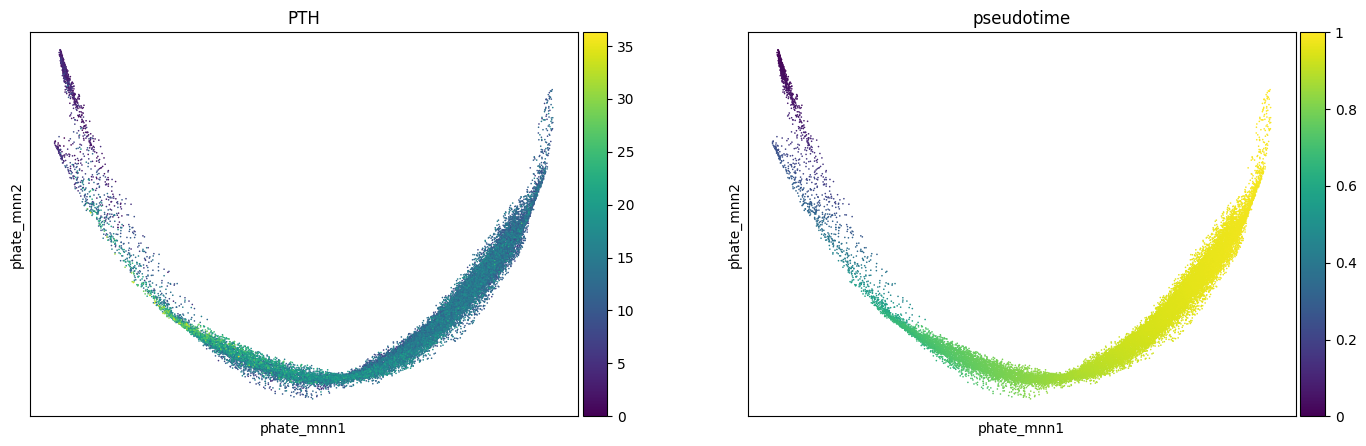

In [15]:
scanpy.pl.scatter(adata, basis='phate_mnn', layers='X_batch_mean', color=['PTH', 'pseudotime'])